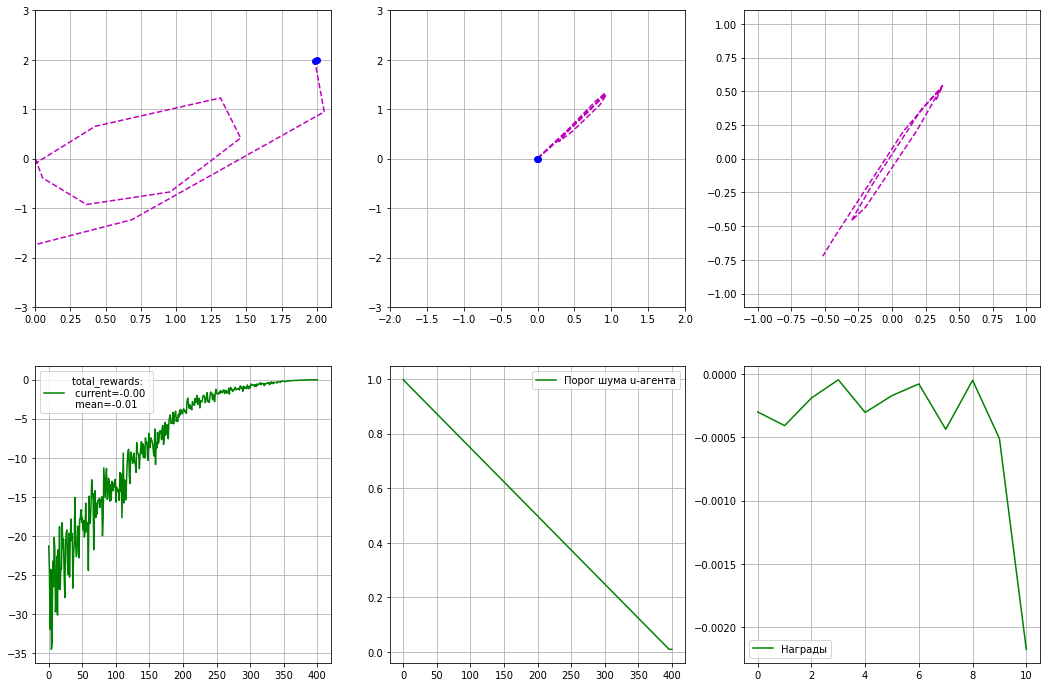

In [26]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
from Environments.TargetProblem.TargetProblem import TargetProblem
from Environments.TargetProblem.TargetProblemVisualizer import TargetProblemVisualizer
from Agents.CEM import CEM_Continuous
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import UniformNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 401
session_n = 20

#environment initialization
env = TargetProblem()

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 256, 128, env.action_dim], output_activation=nn.Tanh())
noise = UniformNoise(action_dim=env.action_dim, threshold_decrease=1/(episode_n * session_n))
agent = CEM_Continuous(env.action_min, env.action_max, pi_model, noise, pi_model_lr=1e-3, 
                       tau=1e-2, percentile_param=70, learning_iter_per_fit=16)

#learning
visualizer = TargetProblemVisualizer(waiting_for_show=20)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500, session_n=session_n, agent_learning='by_sessions')

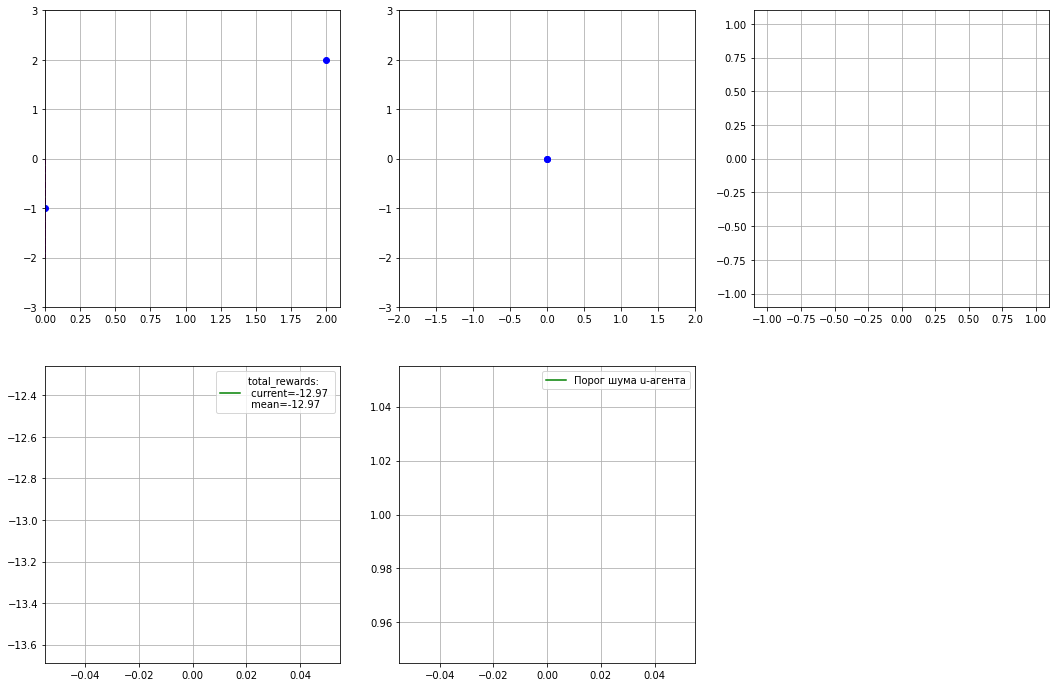

In [19]:
import numpy as np
from Agents.Utilities.Noises import ThreshholdNoise


class ConstantAgent:
    def __init__(self, constant):
        self.constant = constant
        self.noise = ThreshholdNoise()

    def get_action(self, state):
        return self.constant
    
    def fit(self, sessions):
        pass
    
    def reset(self):
        pass
    
    
agent = ConstantAgent(constant=np.zeros(2))
visualizer = TargetProblemVisualizer(waiting_for_show=20)
solver.go(env, agent, episode_n=20, show=visualizer.show, session_len=2500, session_n=session_n, agent_learning='by_sessions')